# Bank data

Term deposits are a major source of income for a bank.
A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term.
The bank has various outreach plans to sell term deposits to their
customers such as email marketing, advertisements, telephonic marketing, and digital marketing.
Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

## Dataset has 20 features
### Bank client data:

**Age**: Client’s age.

**Job**: Client’s type of job.

**Marital**: Client’s marital status, divorced means divorced or widowed.

**Education**: Client’s education.

**Default**: Client has previosly defaulted.

**Housing**: Client has a housing loan.

**Loan**: Client has a personal loan.



### last contact of the current marketing campaign:

**Contact**: Contact communication type (telephone or cellular).

**Month**: Last contact month of year.

**day_of_week**: Last contact day of week.

**duration**: Last contact duration in seconds. If duration is 0s, then we never contacted a client to sign up for a term deposit account.

**Pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

**Previous**: number of contacts performed before this campaign and for this client (numeric)

**Poutcome**: outcome of the previous marketing campaign (categorical: ‘failure’,‘nonexistent’,‘success’)


### Social and economic context attributes:

**Emp.var.rate**: employment variation rate - quarterly indicator (numeric)

**Cons.price.idx**: consumer price index - monthly indicator (numeric)

**Cons.conf.idx**: consumer confidence index - monthly indicator (numeric)

**Euribor3m**: euribor 3 month rate - daily indicator (numeric)

**Nr.employed**: number of employees - quarterly indicator (numeric)


### Target variable :

**y**:has the client subscribed a term deposit? (binary: ‘yes’, ‘no’)



# Import libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from time import time

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score

#### Data load

In [4]:
pd.set_option('display.max_columns', 50) # display maximum columns

In [5]:
df = pd.read_csv(".\\data\\balanced_bank.csv", index_col=0)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
34579,35,admin.,single,university.degree,no,yes,no,cellular,may,thu,143,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
446,42,technician,married,professional.course,no,no,no,telephone,may,tue,1623,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
20173,36,admin.,married,university.degree,no,no,no,cellular,aug,mon,610,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
18171,37,admin.,married,high.school,no,yes,yes,telephone,jul,wed,1089,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
30128,31,management,single,university.degree,no,yes,no,cellular,apr,thu,211,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no


#### Filtering

In [7]:
df = df.reset_index(drop=True) # Remove index from table

In [8]:
df.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,admin.,single,university.degree,no,yes,no,cellular,may,thu,143,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,42,technician,married,professional.course,no,no,no,telephone,may,tue,1623,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,36,admin.,married,university.degree,no,no,no,cellular,aug,mon,610,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes


#### Check data

In [9]:
df.shape

(9280, 21)

In [10]:
print("Number of rows in dataset is: ", df.shape[0])
print("Number of columns in dataset is: ", df.shape[1])

Number of rows in dataset is:  9280
Number of columns in dataset is:  21


In [11]:
# Statistical Summary
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000
mean,40.458836,386.849353,2.320905,888.347198,0.316703,-0.492748,93.482002,-40.181897,2.968123,5135.510938
std,11.963006,356.641761,2.294474,312.500496,0.699808,1.723356,0.634630,5.359290,1.890823,87.040463
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,145.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000
50%,38.000000,265.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000
75%,48.000000,526.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In the description of dataset it is written that there are some outlier data in duration feature. Min value is 0, 526 is located on 75 percent and max is 4199. 
on campaign features value 3 is on 75 percent and max is 35.

In [12]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There is no any missing values in our dataset

In [13]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Data Visualization

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

The distplot shows the distribution of a univariate set of observations.

In [14]:
df['y'].value_counts(normalize = True)

no     0.5
yes    0.5
Name: y, dtype: float64

In [15]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = df[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue='y')
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

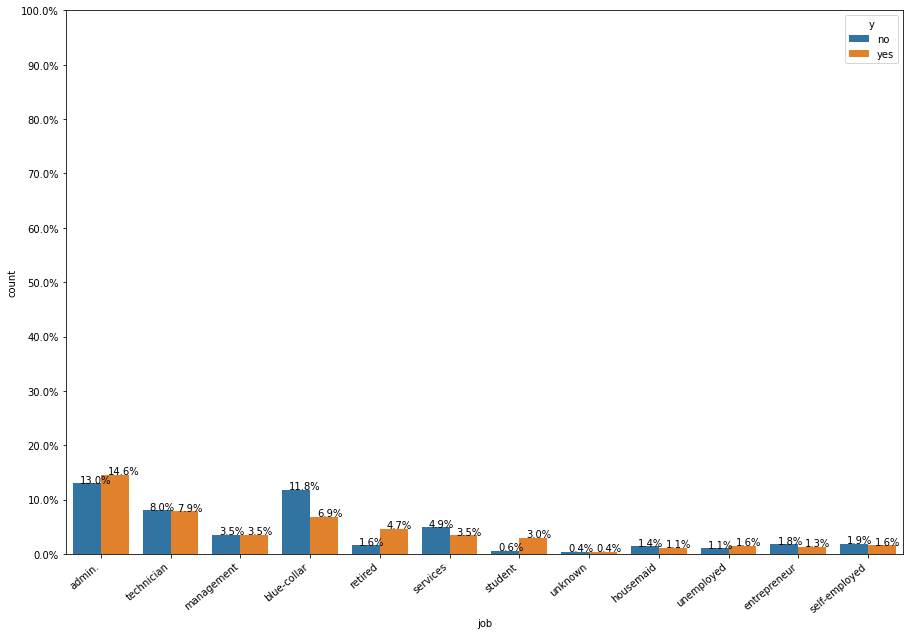

In [16]:
countplot("job", df)

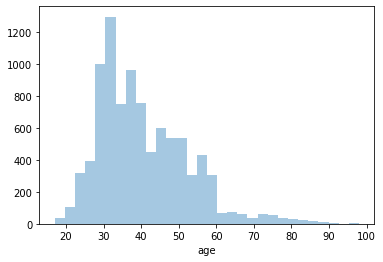

In [17]:
ax = sns.distplot(df['age'],kde=False,bins=30)

Age spread over dataset. Mostly deposit ages between are 30-40.

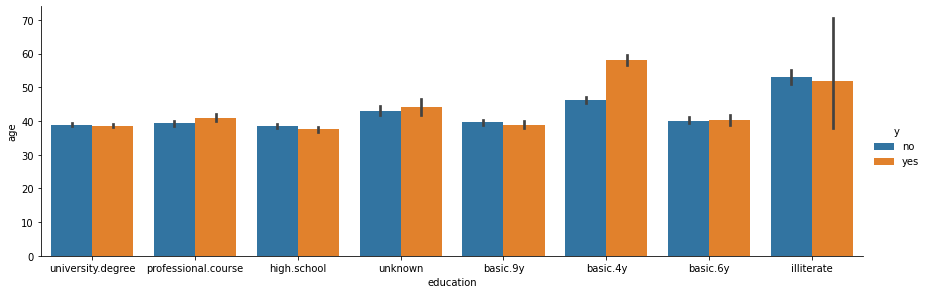

In [18]:
ax = sns.catplot(x="education", y="age", hue="y", kind="bar", data=df, height=4, aspect=3,)

Our target is y. Determine what ages of education relate with y. As we see basis 4 years and illiteraste have higher value and these kind of people did not get deposit.

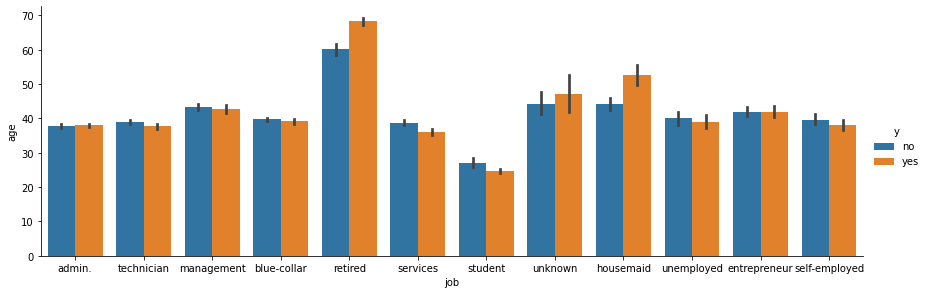

In [19]:
ax = sns.catplot(x="job", y="age", hue="y", kind="bar", data=df, height=4, aspect=3,)

what ages of job position relate with y. As we see retired, unknown and housemaid of category did not get deposit.

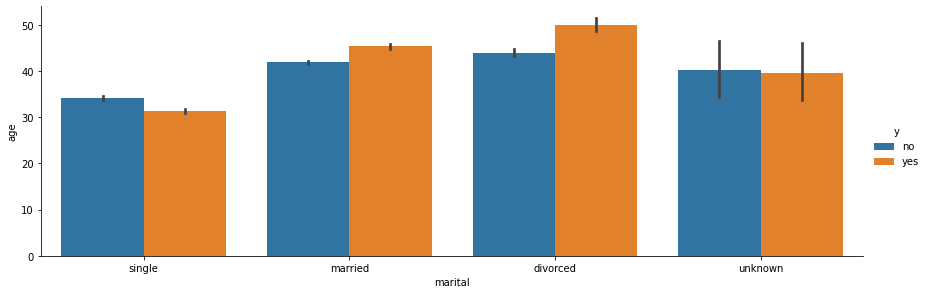

In [20]:
sns.catplot(x="marital", y="age", hue="y", kind="bar", data=df, height=4, aspect=3,)

Single people less appeal for deposit than married and divorced.

In [21]:
df['marital'].value_counts()

married     5393
single      2885
divorced     980
unknown       22
Name: marital, dtype: int64

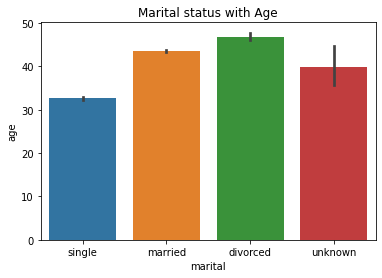

In [22]:
sns.barplot(x='marital',y='age',data=df)
plt.title('Marital status with Age')
plt.show()

Too as we see divorced category are more than others. Married and divorced are predominantly for y data by age.

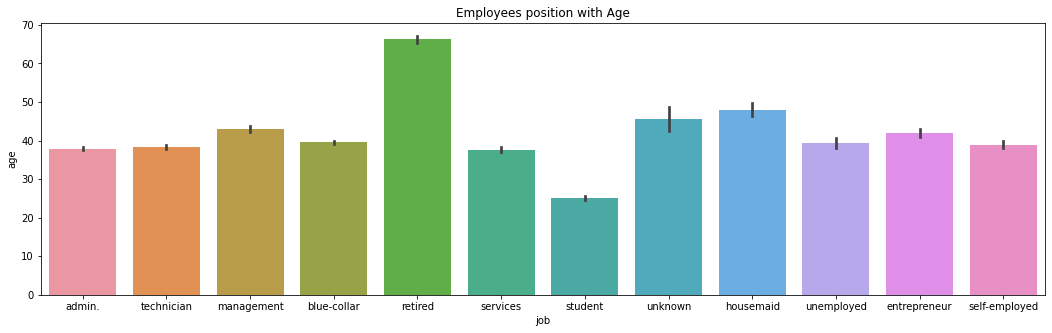

In [23]:
f,ax=plt.subplots(figsize=(18,5))
sns.barplot(x='job',y='age',data=df)
plt.title('Employees position with Age')
plt.show()

Mostly retired category appealed for deposit and this type of people age is between 60-70.

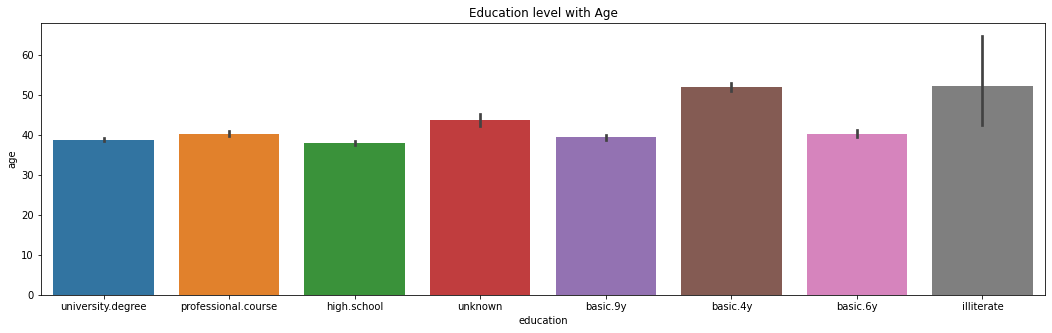

In [24]:
f,ax=plt.subplots(figsize=(18,5))
sns.barplot(x='education',y='age',data=df)
plt.title('Education level with Age')
plt.show()

As we see uneducated categiry appeal for deposit. Unknown, basic 4 years and iliterate.

# Preprocessing data

In [25]:
df_dup = df[df.duplicated(keep='last')]

In [26]:
print('Sum duplicate rows :', df_dup.shape)

Sum duplicate rows : (301, 21)


Dataset has 301 puplicates row. we need to drop.

In [27]:
df_dup_del = df.drop_duplicates()
df_dup_del

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,admin.,single,university.degree,no,yes,no,cellular,may,thu,143,1,999,1,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,42,technician,married,professional.course,no,no,no,telephone,may,tue,1623,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,36,admin.,married,university.degree,no,no,no,cellular,aug,mon,610,2,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
3,37,admin.,married,high.school,no,yes,yes,telephone,jul,wed,1089,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
4,31,management,single,university.degree,no,yes,no,cellular,apr,thu,211,1,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9274,45,blue-collar,married,basic.6y,unknown,no,no,telephone,may,tue,858,6,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
9275,45,blue-collar,married,unknown,no,yes,no,cellular,apr,thu,944,1,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,yes
9276,60,admin.,married,university.degree,no,yes,no,cellular,may,mon,1602,2,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1,yes
9277,38,blue-collar,married,basic.9y,no,yes,no,cellular,apr,fri,612,1,999,1,failure,-1.8,93.075,-47.1,1.405,5099.1,no


In [28]:
# Encoding categorical data
# According to visulaize some data, there are some data has majoirty than others in feature.

df_dup_del["education"].replace({"unknown": "0", "illiterate": "1","basic.4y": "2","basic.6y": "3", "basic.9y": "4","high.school": "5","professional.course": "6","university.degree": "7"}, inplace=True)
df_dup_del["y"].replace({"no": "0", "yes": "1"}, inplace=True)

In [29]:
# dtypes of data

df_dup_del.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [30]:
# Encoding object features by dummy variable.

df_dum = pd.get_dummies(df_dup_del, columns = ['job','marital', 'default', 'housing', 'loan', 'contact', 'poutcome'])
df_dum

,age,education,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,35,7,may,thu,143,1,999,1,-1.8,92.893,-46.2,1.266,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0
1,42,6,may,tue,1623,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
2,36,7,aug,mon,610,2,999,0,1.4,93.444,-36.1,4.965,5228.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,37,5,jul,wed,1089,2,999,0,1.4,93.918,-42.7,4.963,5228.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0
4,31,7,apr,thu,211,1,999,0,-1.8,93.075,-47.1,1.365,5099.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9274,45,3,may,tue,858,6,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0
9275,45,0,apr,thu,944,1,999,1,-1.8,93.075,-47.1,1.410,5099.1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0
9276,60,7,may,mon,1602,2,999,0,-1.8,92.893,-46.2,1.354,5099.1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0
9277,38,4,apr,fri,612,1,999,1,-1.8,93.075,-47.1,1.405,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0


In [31]:
# Remove month and day_of_week features.

df_dum.drop(['month','day_of_week'],axis=1,inplace=True)

In [63]:
# Correlation between features for train
train_corr  = df_dum.corr(method='pearson').abs()
train_corr.style.background_gradient(cmap='cool').set_precision(2)

In [64]:
train_corr  = df_dum.corr(method='pearson').abs()
upper_tri = train_corr.where(np.triu(np.ones(train_corr.shape),k=1).astype(np.bool))
lower_tri = train_corr.where(np.tril(np.ones(train_corr.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.82)]
to_drop1 = [column for column in lower_tri.columns if any(lower_tri[column] < 0)]
print('More than 0.82 is: ', to_drop,'\n',
      'Less than -0.85 is: ', to_drop1)
df1 = df_dum.drop(to_drop, axis=1)
print('Shape: ', df1.shape)
df1.corr(method='pearson').style.background_gradient(cmap='cool').set_precision(2)

More than 0.82 is:  ['euribor3m', 'nr.employed', 'default_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'poutcome_nonexistent', 'poutcome_success'] 
 Less than -0.85 is:  []
Shape:  (8979, 32)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,housing_no,housing_unknown,loan_no,contact_cellular,poutcome_failure
age,1.00,-0.02,0.01,-0.06,0.06,-0.05,-0.01,0.13,-0.13,-0.03,0.02,0.10,0.06,0.56,-0.03,-0.07,-0.25,-0.08,-0.02,0.04,0.19,0.30,-0.45,-0.00,-0.12,-0.01,0.00,0.01,-0.00,0.01
duration,-0.02,1.00,-0.01,0.04,-0.05,0.08,0.06,-0.06,-0.02,0.05,0.02,-0.01,-0.00,-0.01,0.01,0.01,-0.01,-0.01,-0.01,-0.01,-0.01,0.01,-0.00,0.01,-0.01,0.01,-0.00,-0.01,0.02,-0.04
campaign,0.01,-0.01,1.00,0.09,-0.10,0.20,0.13,-0.03,0.00,0.02,0.00,0.01,-0.01,-0.02,0.01,0.02,-0.03,-0.01,-0.01,0.01,-0.01,0.02,-0.02,0.00,-0.08,0.02,-0.01,-0.01,-0.12,-0.06
pdays,-0.06,0.04,0.09,1.00,-0.70,0.33,0.03,-0.16,-0.04,0.11,0.04,-0.01,-0.01,-0.09,0.03,0.05,-0.11,0.00,-0.05,-0.01,0.00,0.04,-0.04,-0.00,-0.12,0.02,-0.00,0.01,-0.16,0.05
previous,0.06,-0.05,-0.10,-0.70,1.00,-0.38,-0.06,0.07,0.02,-0.10,-0.03,-0.00,0.02,0.09,-0.03,-0.04,0.11,0.00,0.03,0.01,-0.00,-0.03,0.04,0.00,0.14,-0.02,0.02,-0.01,0.22,0.48
emp.var.rate,-0.05,0.08,0.20,0.33,-0.38,1.00,0.72,-0.07,-0.05,0.14,0.04,0.02,-0.01,-0.15,0.02,0.07,-0.15,0.04,-0.05,0.00,0.03,0.09,-0.11,0.00,-0.28,0.06,-0.00,-0.00,-0.43,-0.29
cons.price.idx,-0.01,0.06,0.13,0.03,-0.06,0.72,1.00,-0.17,-0.04,0.10,0.02,0.02,-0.02,-0.07,0.00,0.05,-0.06,-0.01,-0.02,0.02,0.03,0.04,-0.07,-0.01,-0.17,0.06,0.01,-0.01,-0.49,-0.21
cons.conf.idx,0.13,-0.06,-0.03,-0.16,0.07,-0.07,-0.17,1.00,0.03,-0.11,-0.03,0.04,0.01,0.10,-0.01,-0.05,0.03,0.01,0.02,0.02,-0.02,0.04,-0.03,0.01,0.00,0.03,0.01,0.02,-0.14,-0.05
job_admin.,-0.13,-0.02,0.00,-0.04,0.02,-0.05,-0.04,0.03,1.00,-0.29,-0.11,-0.10,-0.17,-0.16,-0.12,-0.19,-0.12,-0.27,-0.10,-0.06,0.01,-0.12,0.12,-0.01,0.13,-0.00,0.00,-0.01,0.06,-0.00
job_blue-collar,-0.03,0.05,0.02,0.11,-0.10,0.14,0.10,-0.11,-0.29,1.00,-0.09,-0.08,-0.13,-0.12,-0.09,-0.14,-0.09,-0.21,-0.08,-0.04,-0.04,0.12,-0.10,0.01,-0.19,0.03,0.00,0.01,-0.14,-0.03


Dataset has some high correlation values and need to drop. 

euribor3m, nr.employed, default_unknown, housing_yes, loan_unknown, loan_yes, contact_telephone, poutcome_nonexistent, poutcome_success

# Train-Test spliting and Scaling

In [34]:
X = df1.drop(['y'],axis=1)
X.shape

(8979, 31)

In [35]:
y = df1["y"]
y.shape

(8979,)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, shuffle=True)

In [37]:
# Scaling 

sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

# Modelling

In [38]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
#fit model
classifier.fit(X_train_sc, y_train)

#predict
y_pred = classifier.predict(X_test_sc)

#accuray
accuracy = classifier.score(X_test_sc,y_test)
print('Accuracy of the model is',accuracy*100,'%')

Accuracy of the model is 80.79064587973274 %


In [39]:
kfold = KFold(n_splits=10)
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)

results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%%, Standard Deviation: (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 81.880%, Standard Deviation: (1.090%)


KNeighborsClassifier's accuracy is 80% and with k_fold is 81.9

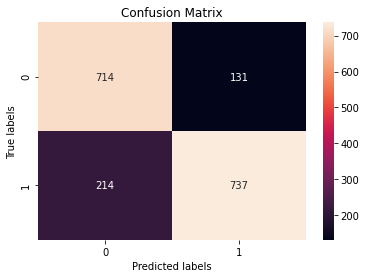

In [40]:
cm = confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

## Different modelds by K-fold

In [41]:
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts

Score=[]

classifiers=['GradientBoostingClassifier','Logistic Regression','KNN','Decision Tree','Random Forest',
             'AdaBoostClassifier','SGDClassifier','BaggingClassifier']
models=[GradientBoostingClassifier(),LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),
        RandomForestClassifier(n_estimators=100),AdaBoostClassifier(),SGDClassifier(),BaggingClassifier()]
for i in models:
    model = i
    
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = 'accuracy')
       
    Score.append(cv_result.mean())
Compare_models=pd.DataFrame({'accuracy':Score},index=classifiers)       
Compare_models

,accuracy
GradientBoostingClassifier,0.882060
Logistic Regression,0.845642
KNN,0.818801
Decision Tree,0.823144
Random Forest,0.877605
AdaBoostClassifier,0.873818
SGDClassifier,0.733379
BaggingClassifier,0.864017


It is obvious that Gradient Boosting Classifier and Random Forest has high score than others.

## Gradient Boosting Classifier

In [42]:
#fit model
GBC=GradientBoostingClassifier()

#predict
GBC.fit(X_train_sc,y_train)

#accuray
y_pred = GBC.predict(X_test_sc)
print ("Gradient Boosting Classifier accuracy score: {0:0.3f}: ".format(accuracy_score(y_test, y_pred)))


Gradient Boosting Classifier accuracy score: 0.893: 


In [43]:
GBC=GradientBoostingClassifier()

GBC_score = cross_val_score(GBC,X,y, cv = kfold,scoring = 'accuracy')
print ("Gradient Boosting Classifier CV score: {0:0.3f}: ".format(GBC_score.mean()))

Gradient Boosting Classifier CV score: 0.882: 


###  Hyperparameter Tuning GradientBoostingClassifier

In [44]:
gbc_grid = {'loss':['deviance', 'exponential'],
            'learning_rate':[float(x) for x in np.linspace(0.1, 10.0, num = 8)],
           'n_estimators':[int(x) for x in np.linspace(20, 200, num = 10)],
            'subsample':[float(x) for x in np.linspace(1.0, 15.0, num = 5)],
            'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
            'max_features':['auto','sqrt','log2'],
           'max_leaf_nodes':[int(x) for x in np.linspace(10, 100, num = 10)]}

In [45]:
GBC = GradientBoostingClassifier()
GBC_rscv = RandomizedSearchCV(GBC, param_distributions = gbc_grid, cv = 10, verbose = 3, random_state = 42, n_jobs = 4)
GBC_rscv.fit(X, y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=4,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.1,
                                                          1.5142857142857145,
                                                          2.928571428571429,
                                                          4.3428571428571425,
                                                          5.757142857142857,
                                                          7.171428571428572,
                                                          8.585714285714285,
                                                          10.0],
                                        'loss': ['deviance', 'exponential'],
                                        'max_

In [46]:
# Best paramtr for Gradient Boosting Classifier
GBC_rscv.best_params_

{'subsample': 1.0,
 'n_estimators': 60,
 'max_leaf_nodes': 80,
 'max_features': 'sqrt',
 'loss': 'deviance',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [47]:
GBC=GradientBoostingClassifier(n_estimators=60,subsample=1, max_leaf_nodes=80, loss='deviance', 
                             learning_rate=0.1,max_features='sqrt', criterion = 'friedman_mse', random_state = 42)

GBC_score = cross_val_score(GBC,X,y, cv = kfold,scoring = 'accuracy')
print ("Gradient Boosting Classifier CV score: {0:0.3f}: ".format(GBC_score.mean()))

Gradient Boosting Classifier CV score: 0.878: 


In [48]:
# Fit best paramtrs for modelling. 
GBC=GradientBoostingClassifier(n_estimators=60,subsample=1, max_leaf_nodes=80, loss='deviance', 
                             learning_rate=0.1,max_features='sqrt', criterion = 'friedman_mse', random_state = 42)
GBC.fit(X_train_sc,y_train)

   
y_pred = GBC.predict(X_test_sc)
print ("Gradient Boosting Classifier accuracy score: {0:0.3f}: ".format(accuracy_score(y_test, y_pred)))


Gradient Boosting Classifier accuracy score: 0.880: 


## AdaBoost Boosting Classifier

In [49]:
ADA=AdaBoostClassifier()
ADA.fit(X_train_sc,y_train)

   
y_pred = ADA.predict(X_test_sc)
print ("Gradient Boosting Classifier accuracy score: {0:0.3f}: ".format(accuracy_score(y_test, y_pred)))


Gradient Boosting Classifier accuracy score: 0.878: 


In [50]:
ADA=AdaBoostClassifier()

ADA_score = cross_val_score(ADA,X,y, cv = 5,scoring = 'accuracy')
print ("ADA Boosting Classifier CV score: {0:0.3f}: ".format(ADA_score.mean()))

ADA Boosting Classifier CV score: 0.870: 


###  Hyperparameter Tuning AdaBoostClassifier

In [51]:
ab_clf = AdaBoostClassifier(random_state=42)
parameters = {
    'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(ab_clf, parameters, cv=5, verbose=3, n_jobs=6)
clf.fit(X_train_sc, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=6,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          20]},
             verbose=3)

In [52]:
clf.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.97, 'n_estimators': 20}

In [53]:
AD=AdaBoostClassifier(n_estimators=20,algorithm = 'SAMME.R', learning_rate = 1.04)

AD_score = cross_val_score(AD,X,y, cv = 5,scoring = 'accuracy')
print ("Ada Boosting Classifier CV score: {0:0.3f}: ".format(AD_score.mean()))

Ada Boosting Classifier CV score: 0.865: 


In [54]:
# Fit best paramtrs for modelling. 
AD=AdaBoostClassifier(n_estimators=20,algorithm = 'SAMME.R', learning_rate = 1.04)
AD.fit(X_train_sc,y_train)
   
y_pred = AD.predict(X_test_sc)
print ("Gradient Boosting Classifier accuracy score: {0:0.3f}: ".format(accuracy_score(y_test, y_pred)))


Gradient Boosting Classifier accuracy score: 0.864: 


## Random Forest Classifier

In [55]:
RF=RandomForestClassifier()
RF.fit(X_train_sc,y_train)

   
y_pred = RF.predict(X_test_sc)
print ("Random Forest Classifier accuracy score: {0:0.3f}: ".format(accuracy_score(y_test, y_pred)))

Random Forest Classifier accuracy score: 0.890: 


In [56]:
RF=RandomForestClassifier()

RF_score = cross_val_score(RF,X,y, cv = kfold,scoring = 'accuracy')
print ("Random Forest Classifier CV score: {0:0.3f}: ".format(RF_score.mean()))

Random Forest Classifier CV score: 0.878: 


###  Hyperparameter Tuning Random Forest Classifier

In [57]:
RF = RandomForestClassifier()

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              }

# run grid search
grid_search = GridSearchCV(RF, param_grid=param_grid)
grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [1, 3, 10]})

In [58]:
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [59]:
clf = RandomForestClassifier(criterion='entropy', max_features=10, bootstrap= True, min_samples_split=10,
     max_depth=None, min_samples_leaf=1)

cv_result = cross_val_score(clf,X,y, cv = 5,scoring = "accuracy")
cv_result.mean()

0.8819474412343119

In [60]:
clf = RandomForestClassifier(criterion='entropy', max_features=10, bootstrap= True, min_samples_split=10,
     max_depth=None, min_samples_leaf=1)
   
clf.fit(X_train_sc, y_train)

y_pred = clf.predict(X_test_sc)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Model accuracy score: 0.8914


# Conclusion

Gradient Boosting Classifier, AdaBoost Classifier and Random Forest score are more than 0.86.

Gradient Boosting Classifier score is 0.875 and with K-Fold is 0.882. While check with hyperparametrs, score is 0.870 and with K-Fold is 0.878. So Gradient Boosting Classifier score with K-Fold is better.

Ada Boosting Classifier score is 0.862 and with K-Fold is 0.870. While check with hyperparametrs, score is 0.869 and with K-Fold is 0.865. So Ada Boosting Classifier score with K-Fold is better.

Random forest score is 0.874 and with K-Fold is 0.876. While check with hyperparametrs, score is 0.879 and with K-Fold is 0.883. So Ada Boosting Classifier score with K-Fold is better.

Compare models Random forest husing hyperparameter tuning got high accuracy than others, we se that accuracy is **0.883**.